# Classification Tree

In [35]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy.combinatorics.subsets import Subset

In [36]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

## Preprocessing

### Fill all the missing values

In [37]:
bakery=pd.read_csv('bakery_business.csv')

In [38]:
bakery.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'hours', 'Monday', 'Sunday', 'RestaurantsDelivery',
       'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'DogsAllowed',
       'NoiseLevel', 'RestaurantsTakeOut', 'Caters', 'BikeParking',
       'attributes', 'HappyHour', 'WheelchairAccessible', 'OutdoorSeating',
       'RestaurantsGoodForGroups', 'Alcohol', 'RestaurantsReservations',
       'GoodForKids', 'HasTV', 'RestaurantsAttire', 'DriveThru', 'WiFi',
       'ByAppointmentOnly', 'BusinessAcceptsBitcoin',
       'RestaurantsTableService', 'Corkage', 'BYOBCorkage', 'Smoking',
       'CoatCheck', 'GoodForDancing', 'BYOB', 'AcceptsInsurance',
       'Open24Hours', 'garage', 'street', 'validated', 'lot', 'valet',
       'BusinessParking', 'Ambience', 'touristy', 'hipster', 'romantic',
       'divey', 'i

In [39]:
#bakery=bakery[bakery['stars']!=3]
def conditions(s):
    if (s['stars']>3):
        return 1
    elif (s['stars']==3):
        return 0
    else:
        return -1

In [40]:
bakery['Recommendation']=bakery.apply(conditions,axis=1)

In [44]:
bakery.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,saturday,DietaryRestrictions,dairy-free,gluten-free,vegan,kosher,halal,soy-free,vegetarian,Recommendation
0,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BFd5KnVmxkFH3WjbydJI3Q,Sam's Club,355 State Rd 436,Fern Park,FL,32730,28.655695,-81.337257,3.0,21,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Q2vefh0tGhtCGQDK1FI7cw,Piece of Cake,3215 Roswell Rd NE,Atlanta,GA,30305,33.842875,-84.378539,4.0,231,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,9UbSRTD_Ly2AlJ1hjEt4TA,Uncle Tetsu's Japanese Cheesecake,1151 Robson Street,Vancouver,BC,V6E 1B5,49.285464,-123.125939,4.0,5,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,bBNCUzEJZn8ASQ5LNWOHEg,Panera Bread,1334 Park St,Stoughton,MA,2072,42.101801,-71.066536,2.5,55,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [272]:
bakery=bakery[bakery['state']=='FL']

In [45]:
def fillna(s):
    if (s=='True'):
        return 1
    elif (s=='False'):
        return -1
    else:
        return 0

In [48]:
def changetosame(s):
    if (s==1):
        return 1
    elif (s==0):
        return -1

### Feature selecting

In [90]:
bakery_x=pd.DataFrame()
bakery_x['Caters']=bakery['Caters'].apply(fillna)
bakery_x['RestaurantsDelivery']=bakery['RestaurantsDelivery'].apply(fillna)
bakery_x['BusinessAcceptsCreditCards']=bakery['BusinessAcceptsCreditCards'].apply(fillna)
bakery_x['DogsAllowed']=bakery['DogsAllowed'].apply(fillna)
bakery_x['RestaurantsTakeOut']=bakery['RestaurantsTakeOut'].apply(fillna)
bakery_x['BikeParking']=bakery['BikeParking'].apply(fillna)
bakery_x['parkinggarage']=bakery['garage'].apply(fillna)
bakery_x['parkingstreet']=bakery['street'].apply(fillna)
bakery_x['WheelchairAccessible']=bakery['WheelchairAccessible'].apply(fillna)
bakery_x['OutdoorSeating']=bakery['OutdoorSeating'].apply(fillna)
bakery_x['RestaurantsGoodForGroups']=bakery['RestaurantsGoodForGroups'].apply(fillna)
bakery_x['RestaurantsReservations']=bakery['RestaurantsReservations'].apply(fillna)
bakery_x['GoodForKids']=bakery['GoodForKids'].apply(fillna)
bakery_x['HasTV']=bakery['HasTV'].apply(fillna)
bakery_x['DriveThru']=bakery['DriveThru'].apply(fillna)
bakery_x['RestaurantsTableService']=bakery['RestaurantsTableService'].apply(fillna)
bakery_x['BusinessAcceptsBitcoin']=bakery['BusinessAcceptsBitcoin'].apply(fillna)
bakery_x['Music']=bakery['Music'].apply(changetosame)
bakery_x['GoodForMeal']=bakery['GoodForMeal'].apply(changetosame)
bakery_x

,Caters,RestaurantsDelivery,BusinessAcceptsCreditCards,DogsAllowed,RestaurantsTakeOut,BikeParking,parkinggarage,parkingstreet,WheelchairAccessible,OutdoorSeating,RestaurantsGoodForGroups,RestaurantsReservations,GoodForKids,HasTV,DriveThru,RestaurantsTableService,BusinessAcceptsBitcoin,Music,GoodForMeal
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1
3423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1
3424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1
3425,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1


In [50]:
bakery_y=bakery['Recommendation']
bakery_y

0       1
1       0
2       1
3       1
4      -1
       ..
3422    1
3423    0
3424    1
3425    1
3426    1
Name: Recommendation, Length: 3427, dtype: int64

In [91]:
bakery_x.columns

Index(['Caters', 'RestaurantsDelivery', 'BusinessAcceptsCreditCards',
       'DogsAllowed', 'RestaurantsTakeOut', 'BikeParking', 'parkinggarage',
       'parkingstreet', 'WheelchairAccessible', 'OutdoorSeating',
       'RestaurantsGoodForGroups', 'RestaurantsReservations', 'GoodForKids',
       'HasTV', 'DriveThru', 'RestaurantsTableService',
       'BusinessAcceptsBitcoin', 'Music', 'GoodForMeal'],
      dtype='object')

### Spliting Features in different types

In [52]:
bakery_service=bakery_x[['RestaurantsDelivery','RestaurantsTakeOut','OutdoorSeating','RestaurantsTableService','DriveThru']]

In [53]:
bakery_payment=bakery_x[['BusinessAcceptsCreditCards','BusinessAcceptsBitcoin']]

In [54]:
bakery_hardware=bakery_x[['DogsAllowed','BikeParking', 'parkinggarage','HasTV',
       'parkingstreet', 'WheelchairAccessible','RestaurantsReservations','Music']]

In [55]:
bakery_goodfor=bakery_x[['RestaurantsGoodForGroups','GoodForMeal','GoodForKids']]

In [56]:
bakery_clf=bakery_x
bakery_clf['Recommendation']=bakery['Recommendation']
bakery_clf['business_id']=bakery['business_id']
bakery_clf.to_csv('bakery_clf.csv')

## Training the decision tree classifications

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [58]:
import pydotplus

In [59]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
from sklearn import tree

### Decision Tree for Service

In [60]:
Service_X_train,Service_X_test,Service_y_train,Service_y_test=train_test_split(bakery_service,bakery_y, test_size=0.7, random_state=1)

In [61]:
clf1= DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf1= clf1.fit(Service_X_train,Service_y_train)

#Predict the response for test dataset
Service_y_pred=clf1.predict(Service_X_test)

In [62]:
print("Accuracy:",metrics.accuracy_score(Service_y_test,Service_y_pred))

Accuracy: 0.8065860775323052


In [63]:
print(classification_report(Service_y_test,Service_y_pred))
print(confusion_matrix(Service_y_test,Service_y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       228
           0       0.00      0.00      0.00       236
           1       0.81      1.00      0.89      1935

    accuracy                           0.81      2399
   macro avg       0.27      0.33      0.30      2399
weighted avg       0.65      0.81      0.72      2399

[[   0    0  228]
 [   0    0  236]
 [   0    0 1935]]


/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Visualizing the Decision Tree

classname=['Recommend','Neutral','Not-Recommend']
features=['RestaurantsDelivery','RestaurantsTakeOut','OutdoorSeating','RestaurantsTableService','DriveThru']
fig = plt.figure(figsize=(15,15))
tree.plot_tree(clf1,
              feature_names=features,
              class_names=classname,
              filled=True,
              rounded=True)
plt.savefig('decision_tree_service.png')

### Decision Tree for Payment

In [65]:
Payment_X_train,Payment_X_test,Payment_y_train,Payment_y_test = train_test_split(bakery_payment,bakery_y, test_size=0.7, random_state=1)

In [66]:
clf2=DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf2=clf2.fit(Payment_X_train,Payment_y_train)
Payment_y_pred=clf2.predict(Payment_X_test)

In [67]:
print("Accuracy:",metrics.accuracy_score(Payment_y_test,Payment_y_pred))

Accuracy: 0.8065860775323052


In [68]:
print(classification_report(Payment_y_test,Payment_y_pred))
print(confusion_matrix(Payment_y_test,Payment_y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       228
           0       0.00      0.00      0.00       236
           1       0.81      1.00      0.89      1935

    accuracy                           0.81      2399
   macro avg       0.27      0.33      0.30      2399
weighted avg       0.65      0.81      0.72      2399

[[   0    0  228]
 [   0    0  236]
 [   0    0 1935]]


/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classname=['Recommend','Neutral','Not-Recommend']
features=['BusinessAcceptsCreditCards','BusinessAcceptsBitcoin']
fig = plt.figure(figsize=(15,15))
tree.plot_tree(clf2,
              feature_names=features,
              class_names=classname,
              filled=True,
              rounded=True)
plt.savefig('decision_tree_payment.png')

### Decision Tree for Hardware

In [70]:
Hardware_X_train,Hardware_X_test,Hardware_y_train,Hardware_y_test = train_test_split(bakery_hardware,bakery_y, test_size=0.7, random_state=1)
clf3=DecisionTreeClassifier(criterion="entropy", max_depth=8)
clf3=clf3.fit(Hardware_X_train,Hardware_y_train)
Hardware_y_pred=clf3.predict(Hardware_X_test)

In [71]:
print("Accuracy:",metrics.accuracy_score(Hardware_y_test,Hardware_y_pred))

Accuracy: 0.8065860775323052


In [72]:
print(classification_report(Hardware_y_test,Hardware_y_pred))
print(confusion_matrix(Hardware_y_test,Hardware_y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       228
           0       0.00      0.00      0.00       236
           1       0.81      1.00      0.89      1935

    accuracy                           0.81      2399
   macro avg       0.27      0.33      0.30      2399
weighted avg       0.65      0.81      0.72      2399

[[   0    0  228]
 [   0    0  236]
 [   0    0 1935]]


/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classname=['Recommend','Neutral','Not-Recommend']
features=['DogsAllowed','BikeParking', 'parkinggarage','HasTV',
       'parkingstreet', 'WheelchairAccessible','RestaurantsReservations','Music']
fig = plt.figure(figsize=(15,15))
tree.plot_tree(clf3,
              feature_names=features,
              class_names=classname,
              filled=True,
              rounded=True)
plt.savefig('decision_tree_hardware.png')

### Decision Tree for Goodfor

In [74]:
Goodfor_X_train,Goodfor_X_test,Goodfor_y_train,Goodfor_y_test = train_test_split(bakery_goodfor,bakery_y, test_size=0.7, random_state=1)
clf4=DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf4=clf4.fit(Goodfor_X_train,Goodfor_y_train)
Goodfor_y_pred=clf4.predict(Goodfor_X_test)

In [75]:
print("Accuracy:",metrics.accuracy_score(Goodfor_y_test,Goodfor_y_pred))

Accuracy: 0.8065860775323052


In [76]:
print(classification_report(Goodfor_y_test,Goodfor_y_pred))
print(confusion_matrix(Goodfor_y_test,Goodfor_y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       228
           0       0.00      0.00      0.00       236
           1       0.81      1.00      0.89      1935

    accuracy                           0.81      2399
   macro avg       0.27      0.33      0.30      2399
weighted avg       0.65      0.81      0.72      2399

[[   0    0  228]
 [   0    0  236]
 [   0    0 1935]]


/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classname=['Recommend','Neutral','Not-Recommend']
features=['RestaurantsGoodForGroups','GoodForMeal','GoodForKids']
fig = plt.figure(figsize=(15,15))
tree.plot_tree(clf4,
              feature_names=features,
              class_names=classname,
              filled=True,
              rounded=True)
plt.savefig('decision_tree_goodfor.png')

## Classification Tree with non-bool variables

In [105]:
def replacenoise(s):
    if (s['NoiseLevel']=="u'quiet'" or s['NoiseLevel']=="'quiet'"):
        return 0
    elif (s['NoiseLevel']=="u'average'" or s['NoiseLevel']=="'average'"):
        return 1
    elif (s['NoiseLevel']=="u'loud'" or s['NoiseLevel']=="'loud'"):
        return 2
    elif (s['NoiseLevel']=="u'very_loud'" or s['NoiseLevel']=="'very_loud'"):
        return 3
    else:
        return 1
##using average noise level to fill the missing values

In [106]:
bakery['Noise']=bakery.apply(replacenoise,axis=1)

In [107]:
bakery_other=bakery[['Noise','RestaurantsPriceRange2','review_count']]

In [108]:
mean_value=bakery_other['RestaurantsPriceRange2'].mean()
bakery_other['RestaurantsPriceRange2'].fillna(value=mean_value, inplace=True)
#because we don't know the price level of unknown bakeries, so using mean value to fillna, which can ignore the influence of price

/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [109]:
other_X_train,other_X_test,other_y_train,other_y_test = train_test_split(bakery_other,bakery_y,train_size=0.7, random_state=1)
clf5=DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf5=clf5.fit(other_X_train,other_y_train)
other_y_pred=clf5.predict(other_X_test)

In [110]:
print("Accuracy:",metrics.accuracy_score(other_y_test,other_y_pred))

Accuracy: 0.8056365403304179


In [111]:
print(classification_report(other_y_test,other_y_pred))
print(confusion_matrix(other_y_test,other_y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        99
           0       0.00      0.00      0.00       101
           1       0.81      1.00      0.89       829

    accuracy                           0.81      1029
   macro avg       0.27      0.33      0.30      1029
weighted avg       0.65      0.81      0.72      1029



/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: 'numpy.ndarray' object is not callable

classname=['Recommend','Neutral','Not-Recommend']
features=['Noise','RestaurantsPriceRange2','review_count']
fig = plt.figure(figsize=(15,15))
tree.plot_tree(clf5,
              feature_names=features,
              class_names=classname,
              filled=True,
              rounded=True)
plt.savefig('decision_tree_other.png')

## Classification tree with selected variables

In [114]:
bakery_x[['Noise','RestaurantsPriceRange2','review_count']]=bakery[['Noise','RestaurantsPriceRange2','review_count']]
bakery_x

,Caters,RestaurantsDelivery,BusinessAcceptsCreditCards,DogsAllowed,RestaurantsTakeOut,BikeParking,parkinggarage,parkingstreet,WheelchairAccessible,OutdoorSeating,...,GoodForKids,HasTV,DriveThru,RestaurantsTableService,BusinessAcceptsBitcoin,Music,GoodForMeal,Noise,RestaurantsPriceRange2,review_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,0,1.0,135
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,1,2.0,21
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,1,2.0,231
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,1,NaN,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,1,2.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,1,1,1.0,994
3423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,1,1,1.0,30
3424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,-1,1,1.0,20
3425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,1,1,1.0,7


In [119]:
bakery_new=bakery_x[['BusinessAcceptsCreditCards','RestaurantsPriceRange2','Noise','WheelchairAccessible','RestaurantsGoodForGroups',
                    'GoodForKids','HasTV','DriveThru','parkinggarage','parkingstreet','Music']]
bakery_new['RestaurantsPriceRange2']=bakery_new['RestaurantsPriceRange2'].fillna(0)

<ipython-input-119-602170449e54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bakery_new['RestaurantsPriceRange2']=bakery_new['RestaurantsPriceRange2'].fillna(0)


In [122]:
X_train,X_test,y_train,y_test = train_test_split(bakery_new,bakery_y,train_size=0.7, random_state=1)
clf=DecisionTreeClassifier(criterion="entropy", max_depth=11)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        99
           0       0.00      0.00      0.00       101
           1       0.81      1.00      0.89       829

    accuracy                           0.81      1029
   macro avg       0.27      0.33      0.30      1029
weighted avg       0.65      0.81      0.72      1029



/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
from sklearn.tree import DecisionTreeRegressor
regtree=DecisionTreeClassifier(criterion="entropy", max_depth=11)
regtree=regtree.fit(X_train,y_train)
y_pred=regtree.predict(X_test)

In [130]:
print('Accurancy:',metrics.r2_score(y_test,y_pred))

Accurancy: -0.21184468688094182


What can we do for the hardware? linear regression? logistic regression?

# Logistic Regression

Change the response data into recommended and not recommended (if stars>3 is positive, if stars<=3 is negative)

In [85]:
def positive(s):
    if (s['stars']>3):
        return 1
    else:
        return 0

In [86]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [87]:
bakery_pos=bakery.apply(positive,axis=1)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(bakery_x,bakery_pos,train_size=0.7,random_state=0)
logreg= LogisticRegression()
logreg=logreg.fit(X_train, y_train)

In [94]:
y_pred=logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [95]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  0 197]
 [  0 832]]


In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.81      1.00      0.89       832

    accuracy                           0.81      1029
   macro avg       0.40      0.50      0.45      1029
weighted avg       0.65      0.81      0.72      1029



/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From these Decision Tree Classifier with different combination of variables, we found that it is not reasonable to use classifier here.

# Text Analysis

In [12]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yixuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Remove the stop words and calculate the frequence of words

In [4]:
review=pd.read_csv('bakery_review.csv')

In [5]:
re_star=review[['stars', 'text']]

In [6]:
def remove_punc_stopword(text):
    remove_punc=[word for word in text if word not in string.punctuation]
    remove_punc=''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [7]:
re_1star=re_star[re_star['stars']==1]
re_1star['text']=re_1star['text'].apply(remove_punc_stopword)
re_1star.count()

<ipython-input-7-952247d24c41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_1star['text']=re_1star['text'].apply(remove_punc_stopword)


stars    28823
text     28823
dtype: int64

In [12]:
re_1star.head()

,stars,text
0,1.0,"[great, coffee, pastries, baristas, excellent,..."
5,1.0,"[went, usual, grocery, shopping, evening, got,..."
17,1.0,"[cupcakes, terrible, ive, chestnut, hill, camb..."
20,1.0,"[came, today, closed, hope, goes, business, ba..."
29,1.0,"[pretzel, tasted, maybe, bit, stale, cheese, s..."


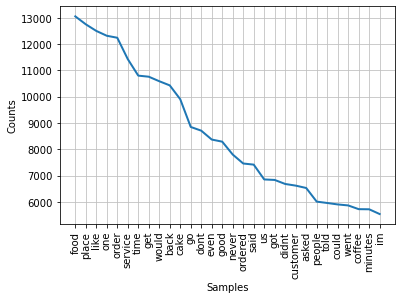

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
re_1star= re_1star.reset_index(drop=True)
words_split1= []
for i in range(0,28823): 
    for word in re_1star['text'][i]:
        words_split1.append(word)
FreqDist(words_split1).plot(30,cumulative=False)

In [28]:
wordfreq1=FreqDist(words_split1)
wordfreq1

FreqDist({'food': 13060, 'place': 12758, 'like': 12506, 'one': 12322, 'order': 12246, 'service': 11433, 'time': 10804, 'get': 10763, 'would': 10591, 'back': 10433, ...})

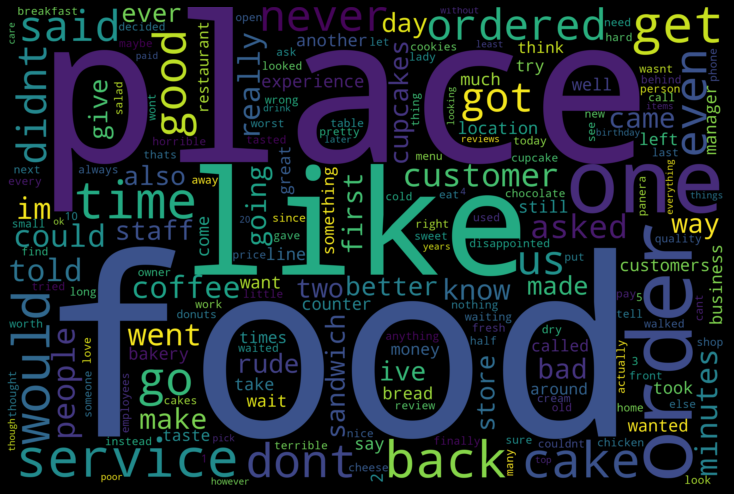

In [29]:
re_1star_text = re_1star['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate_from_frequencies(wordfreq1)

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('wordcloud_1star.jpg')

In [14]:
re_5star=re_star[re_star['stars']==5]
re_5star['text']=re_5star['text'].apply(remove_punc_stopword)
re_5star.count()

<ipython-input-14-ecb41ca0d620>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_5star['text']=re_5star['text'].apply(remove_punc_stopword)


stars    165014
text     165014
dtype: int64

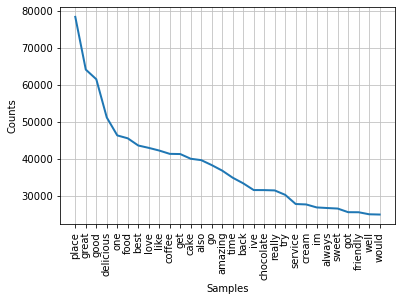

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
re_5star= re_5star.reset_index(drop=True)
words_split5= []
for i in range(0,165014): 
    for word in re_5star['text'][i]:
        words_split5.append(word)
FreqDist(words_split5).plot(30,cumulative=False)

In [32]:
freqword5=FreqDist(words_split5)

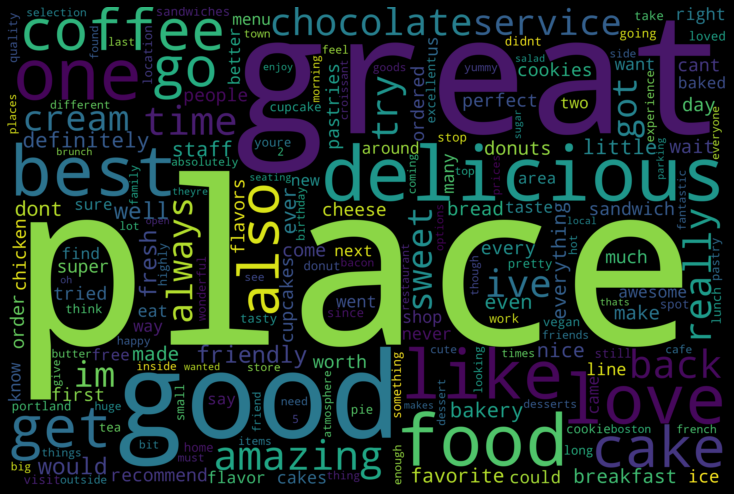

In [33]:
re_5star_text = re_5star['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate_from_frequencies(freqword5)

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('wordcloud_5star.jpg')

In [10]:
re_4star=re_star[re_star['stars']==4]
re_4star['text']=re_4star['text'].apply(remove_punc_stopword)
re_4star.count()

<ipython-input-10-9acc959f8a26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_4star['text']=re_4star['text'].apply(remove_punc_stopword)


stars    91116
text     91116
dtype: int64

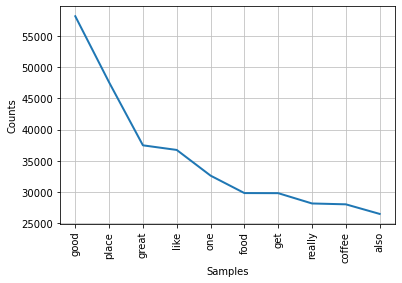

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
re_4star= re_4star.reset_index(drop=True)
words_split = []
for i in range(0,91116): 
    for word in re_4star['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(10,cumulative=False)

In [12]:
re_3star=re_star[re_star['stars']==3]
re_3star['text']=re_3star['text'].apply(remove_punc_stopword)
re_3star.count()

<ipython-input-12-be8b274b4793>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_3star['text']=re_3star['text'].apply(remove_punc_stopword)


stars    40663
text     40663
dtype: int64

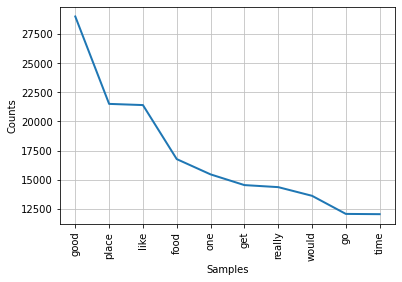

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
re_3star= re_3star.reset_index(drop=True)
words_split = []
for i in range(0,40663): 
    for word in re_3star['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(10,cumulative=False)

In [14]:
re_2star=re_star[re_star['stars']==2]
re_2star['text']=re_2star['text'].apply(remove_punc_stopword)
re_2star.count()

<ipython-input-14-79ae1e3df711>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_2star['text']=re_2star['text'].apply(remove_punc_stopword)


stars    27344
text     27344
dtype: int64

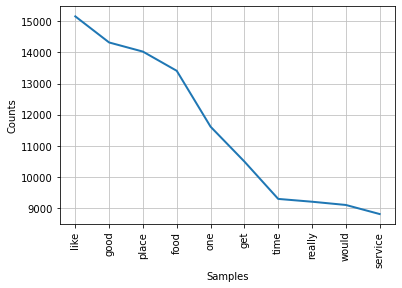

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
re_2star= re_2star.reset_index(drop=True)
words_split = []
for i in range(0,27344): 
    for word in re_2star['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(10,cumulative=False)

The top ten frequncy words of negative reviews include food, services. This would include that for the bakeries that have more negative reviews should improve their service attitude and food taste. The top ten frequency words of positive or neutral reviews include food, and for the positive reviews include coffee as the top ten frequency words, which shows that a good coffee may cause higher stars of bakeries.